In [1]:
from wordcloud import wordcloud
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
import textblob as tb
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [2]:
twitter_data = pd.read_csv('/content/drive/MyDrive/data/twitterdata.csv')

In [3]:
twitter_data.head()

,index,Datetime,Tweet Id,replycount,like,content
0,0,2021-12-24 16:11:40+00:00,1474412470085193728,0,0,#AJIO : Sweatshirts and Hoodies under 499₹\n\nekaro.in/enkr20211224s7…
1,1,2021-12-24 15:40:22+00:00,1474404592217587718,1,0,Hello @AJIOLife \nAlive? Company of your words?😆 #ajio \n@reliancegroup @RelianceDigital twitter.com/_aabhishake_/s… https://t.co/fRs0JSYTQ6
2,2,2021-12-24 11:33:55+00:00,1474342568804511745,1,0,#Ajio @AJIOLife Told me To Refund My Amount by 23rd December but Still Refund not Initiated. I Am Complaining about this issue since 15 days. My Refund is Still Not Initiated. Pls Raise Complain Regarding this. https://t.co/lqgSgCYn4m
3,3,2021-12-24 09:46:20+00:00,1474315497688633344,0,0,"Refund not issued by #Ajio, consumer complaint filed against @AJIOLife \n\n#AJIOlife\n#AJIOlifeForMen \n#AJIOlifeForWomen \n\nvoxya.com/view-complaint… https://t.co/2kc2OLbBjr"
4,4,2021-12-24 09:20:05+00:00,1474308891206774784,1,0,@AJIOLife Show me your work then! There is no progress from your side. Other than these auto generated messages. Send me an actual message then I'll wait. #AJIO #Fraud


In [4]:
twitter_data.isnull().sum()
# CHECKING THE NULL VALUES IN THE DATA 

index         0
Datetime      0
Tweet Id      0
replycount    0
like          0
content       0
dtype: int64

In [5]:
twitter_data.info()
#CHECKING THE INFO OF THE DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28998 entries, 0 to 28997
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       28998 non-null  int64 
 1   Datetime    28998 non-null  object
 2   Tweet Id    28998 non-null  int64 
 3   replycount  28998 non-null  int64 
 4   like        28998 non-null  int64 
 5   content     28998 non-null  object
dtypes: int64(4), object(2)
memory usage: 1.3+ MB


In [6]:
tweets = twitter_data.copy()
# CREATING A COPY OF THE DATASET 

In [7]:
tweets.drop(['Datetime','Tweet Id'],axis = 1,inplace = True)

In [8]:
# WRITING A FUCTION TO CLEAN THE CONTENT OF THE DATA 

In [9]:
def cleantweet(tweet):
  tweet = re.sub(r'@[A-Za-z0-9]+','',tweet) # to remove @
  tweet = re.sub(r'#','',tweet) # to remove hashtags
  tweet = re.sub(r'RT[\s]','',tweet) # to remove retweets 
  tweet = re.sub(r'https?:\/\/\S+','',tweet) # to remove hyperlinks
  tweet = re.sub(r'[^\w\s]', '', tweet) # to remove punctuations
  tweet = re.sub(r'\n','',tweet) # to remove next line 
  tweet = re.sub(r'_','',tweet) # to remove underscore
  tweet = re.sub(" \d+", "", tweet) # to remove numericals 
  return tweet 

In [10]:
tweets['content'] = tweets['content'].apply(cleantweet)

In [11]:
# now lets write another function to remove emojis

In [12]:
def remove_emojis(tweet):
  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', tweet)
# here we are getting rid of all the emojis in the text 

In [13]:
tweets['content'] = tweets['content'].apply(remove_emojis)

In [14]:
tweets.content.head(400)

0      AJIO  Sweatshirts and Hoodies underekaroinenkr20211224s7                                                                                                                                        
1      Hello  Alive Company of your words ajio   twittercomaabhishakes                                                                                                                                 
2      Ajio  Told me To Refund My Amount byrd December but Still Refund not Initiated I Am Complaining about this issue since days My Refund is Still Not Initiated Pls Raise Complain Regarding this  
3      Refund not issued by Ajio consumer complaint filed against  AJIOlifeAJIOlifeForMen AJIOlifeForWomen voxyacomviewcomplaint                                                                       
4       Show me your work then There is no progress from your side Other than these auto generated messages Send me an actual message then Ill wait AJIO Fraud                                         


In [15]:
#lets find subjectivity and polarity

In [16]:
def subjectivity(tweet):
  return tb.TextBlob(tweet).sentiment.subjectivity

In [17]:
tweets['Subjectivity'] = tweets['content'].apply(subjectivity)

In [18]:
tweets

,index,replycount,like,content,Subjectivity
0,0,0,0,AJIO Sweatshirts and Hoodies underekaroinenkr20211224s7,0.000000
1,1,1,0,Hello Alive Company of your words ajio twittercomaabhishakes,0.400000
2,2,1,0,Ajio Told me To Refund My Amount byrd December but Still Refund not Initiated I Am Complaining about this issue since days My Refund is Still Not Initiated Pls Raise Complain Regarding this,0.000000
3,3,0,0,Refund not issued by Ajio consumer complaint filed against AJIOlifeAJIOlifeForMen AJIOlifeForWomen voxyacomviewcomplaint,0.200000
4,4,1,0,Show me your work then There is no progress from your side Other than these auto generated messages Send me an actual message then Ill wait AJIO Fraud,0.491667
...,...,...,...,...,...
28993,28993,1,0,com Matte Grey Black Grey Solid Full Rim Aviator Lenskart Air LA Clip On LA E13284C1 Eyeglasses lenskartcomlenskartairl,0.256667
28994,28994,1,0,com today Ive taken your Gold membership placing one pair classes orderTrust same will be live up on the my expectation,0.312500
28995,28995,0,0,upadhyay com MOTIYABEEN ka ilaz karte ho kyaIss bande karwana hai Naa jaane kaise sweemt lobe kar lete hai bina dekhe,0.000000
28996,28996,1,0,Hi We would like to inform you that your request has been escalated and is under followup for the order refund Any update with the same will be informed to you We appreciate your understanding and patience Thank you Prateek,0.125000


In [19]:
def polarity(tweet):
  return tb.TextBlob(tweet).sentiment.polarity

In [20]:
tweets['Polarity'] = tweets['content'].apply(polarity) 

In [21]:
tweets

,index,replycount,like,content,Subjectivity,Polarity
0,0,0,0,AJIO Sweatshirts and Hoodies underekaroinenkr20211224s7,0.000000,0.000000
1,1,1,0,Hello Alive Company of your words ajio twittercomaabhishakes,0.400000,0.100000
2,2,1,0,Ajio Told me To Refund My Amount byrd December but Still Refund not Initiated I Am Complaining about this issue since days My Refund is Still Not Initiated Pls Raise Complain Regarding this,0.000000,0.000000
3,3,0,0,Refund not issued by Ajio consumer complaint filed against AJIOlifeAJIOlifeForMen AJIOlifeForWomen voxyacomviewcomplaint,0.200000,-0.300000
4,4,1,0,Show me your work then There is no progress from your side Other than these auto generated messages Send me an actual message then Ill wait AJIO Fraud,0.491667,-0.208333
...,...,...,...,...,...,...
28993,28993,1,0,com Matte Grey Black Grey Solid Full Rim Aviator Lenskart Air LA Clip On LA E13284C1 Eyeglasses lenskartcomlenskartairl,0.256667,0.016667
28994,28994,1,0,com today Ive taken your Gold membership placing one pair classes orderTrust same will be live up on the my expectation,0.312500,0.068182
28995,28995,0,0,upadhyay com MOTIYABEEN ka ilaz karte ho kyaIss bande karwana hai Naa jaane kaise sweemt lobe kar lete hai bina dekhe,0.000000,0.000000
28996,28996,1,0,Hi We would like to inform you that your request has been escalated and is under followup for the order refund Any update with the same will be informed to you We appreciate your understanding and patience Thank you Prateek,0.125000,0.000000


In [22]:
tweets.drop(['index'],axis = 1,inplace = True)

In [23]:
final_tweets = tweets[['content','Subjectivity','Polarity']]

In [24]:
final_tweets

,content,Subjectivity,Polarity
0,AJIO Sweatshirts and Hoodies underekaroinenkr20211224s7,0.000000,0.000000
1,Hello Alive Company of your words ajio twittercomaabhishakes,0.400000,0.100000
2,Ajio Told me To Refund My Amount byrd December but Still Refund not Initiated I Am Complaining about this issue since days My Refund is Still Not Initiated Pls Raise Complain Regarding this,0.000000,0.000000
3,Refund not issued by Ajio consumer complaint filed against AJIOlifeAJIOlifeForMen AJIOlifeForWomen voxyacomviewcomplaint,0.200000,-0.300000
4,Show me your work then There is no progress from your side Other than these auto generated messages Send me an actual message then Ill wait AJIO Fraud,0.491667,-0.208333
...,...,...,...
28993,com Matte Grey Black Grey Solid Full Rim Aviator Lenskart Air LA Clip On LA E13284C1 Eyeglasses lenskartcomlenskartairl,0.256667,0.016667
28994,com today Ive taken your Gold membership placing one pair classes orderTrust same will be live up on the my expectation,0.312500,0.068182
28995,upadhyay com MOTIYABEEN ka ilaz karte ho kyaIss bande karwana hai Naa jaane kaise sweemt lobe kar lete hai bina dekhe,0.000000,0.000000
28996,Hi We would like to inform you that your request has been escalated and is under followup for the order refund Any update with the same will be informed to you We appreciate your understanding and patience Thank you Prateek,0.125000,0.000000


In [25]:
from wordcloud import WordCloud 

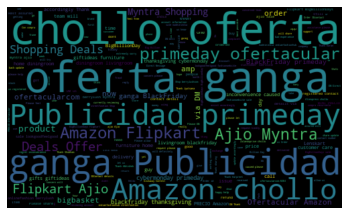

In [26]:
#plotting word cloud 
words = " ".join([twts for twts in final_tweets['content']])
wordcloud = WordCloud(width = 500,height=300).generate(words)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [27]:
final_tweets['Polarity'].describe()

count    28998.000000
mean     0.047889    
std      0.267956    
min     -1.000000    
25%      0.000000    
50%      0.000000    
75%      0.112405    
max      1.000000    
Name: Polarity, dtype: float64

In [28]:
# a function to perform positive negative and neutral analysis
def tweetanalysis(polarity):
  if polarity == 0:
    return 'neutral'
  elif polarity < 0 :
    return 'negative' 
  else:
    return 'positive' 

In [29]:
final_tweets['Analysis'] = final_tweets['Polarity'].apply(tweetanalysis)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
final_tweets

,content,Subjectivity,Polarity,Analysis
0,AJIO Sweatshirts and Hoodies underekaroinenkr20211224s7,0.000000,0.000000,neutral
1,Hello Alive Company of your words ajio twittercomaabhishakes,0.400000,0.100000,positive
2,Ajio Told me To Refund My Amount byrd December but Still Refund not Initiated I Am Complaining about this issue since days My Refund is Still Not Initiated Pls Raise Complain Regarding this,0.000000,0.000000,neutral
3,Refund not issued by Ajio consumer complaint filed against AJIOlifeAJIOlifeForMen AJIOlifeForWomen voxyacomviewcomplaint,0.200000,-0.300000,negative
4,Show me your work then There is no progress from your side Other than these auto generated messages Send me an actual message then Ill wait AJIO Fraud,0.491667,-0.208333,negative
...,...,...,...,...
28993,com Matte Grey Black Grey Solid Full Rim Aviator Lenskart Air LA Clip On LA E13284C1 Eyeglasses lenskartcomlenskartairl,0.256667,0.016667,positive
28994,com today Ive taken your Gold membership placing one pair classes orderTrust same will be live up on the my expectation,0.312500,0.068182,positive
28995,upadhyay com MOTIYABEEN ka ilaz karte ho kyaIss bande karwana hai Naa jaane kaise sweemt lobe kar lete hai bina dekhe,0.000000,0.000000,neutral
28996,Hi We would like to inform you that your request has been escalated and is under followup for the order refund Any update with the same will be informed to you We appreciate your understanding and patience Thank you Prateek,0.125000,0.000000,neutral


In [31]:
final_tweets.Polarity.replace(0,np.nan,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [32]:
final_tweets

,content,Subjectivity,Polarity,Analysis
0,AJIO Sweatshirts and Hoodies underekaroinenkr20211224s7,0.000000,NaN,neutral
1,Hello Alive Company of your words ajio twittercomaabhishakes,0.400000,0.100000,positive
2,Ajio Told me To Refund My Amount byrd December but Still Refund not Initiated I Am Complaining about this issue since days My Refund is Still Not Initiated Pls Raise Complain Regarding this,0.000000,NaN,neutral
3,Refund not issued by Ajio consumer complaint filed against AJIOlifeAJIOlifeForMen AJIOlifeForWomen voxyacomviewcomplaint,0.200000,-0.300000,negative
4,Show me your work then There is no progress from your side Other than these auto generated messages Send me an actual message then Ill wait AJIO Fraud,0.491667,-0.208333,negative
...,...,...,...,...
28993,com Matte Grey Black Grey Solid Full Rim Aviator Lenskart Air LA Clip On LA E13284C1 Eyeglasses lenskartcomlenskartairl,0.256667,0.016667,positive
28994,com today Ive taken your Gold membership placing one pair classes orderTrust same will be live up on the my expectation,0.312500,0.068182,positive
28995,upadhyay com MOTIYABEEN ka ilaz karte ho kyaIss bande karwana hai Naa jaane kaise sweemt lobe kar lete hai bina dekhe,0.000000,NaN,neutral
28996,Hi We would like to inform you that your request has been escalated and is under followup for the order refund Any update with the same will be informed to you We appreciate your understanding and patience Thank you Prateek,0.125000,NaN,neutral


In [33]:
final_tweets.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()

In [36]:
final_tweets['Target'] = le.fit_transform(final_tweets['Analysis'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
final_tweets

,content,Subjectivity,Polarity,Analysis,Target
1,Hello Alive Company of your words ajio twittercomaabhishakes,0.400000,0.100000,positive,1
3,Refund not issued by Ajio consumer complaint filed against AJIOlifeAJIOlifeForMen AJIOlifeForWomen voxyacomviewcomplaint,0.200000,-0.300000,negative,0
4,Show me your work then There is no progress from your side Other than these auto generated messages Send me an actual message then Ill wait AJIO Fraud,0.491667,-0.208333,negative,0
6,Its not about bad software but they are fraudsters Do not buy from Ajio ajio twittercomimrajesh08s,0.666667,-0.700000,negative,0
10,yogendra kushwah delivery man talk to rudely customer Sukhwinder Kaur Ajio,0.600000,-0.300000,negative,0
...,...,...,...,...,...
28988,Hi Farzad Apologies for the inconvenience We will definitely help you in this matter We are currently reviewing your account information and be assured we will try our best to answer all your questions accordingly Payal,0.400000,0.333333,positive,1
28991,Hi Dinesh Thank you for the purchase We will definitely try to meet your expectation Rest be assured we are always there to help you in case of any issue kindly write back to us Thank you Payal,0.466667,0.200000,positive,1
28993,com Matte Grey Black Grey Solid Full Rim Aviator Lenskart Air LA Clip On LA E13284C1 Eyeglasses lenskartcomlenskartairl,0.256667,0.016667,positive,1
28994,com today Ive taken your Gold membership placing one pair classes orderTrust same will be live up on the my expectation,0.312500,0.068182,positive,1


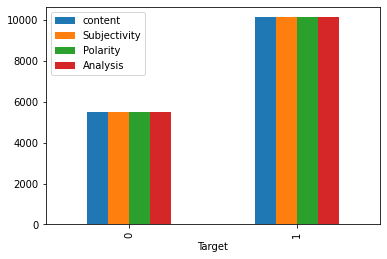

In [38]:
final_tweets.groupby('Target').count().plot(kind='bar')

In [39]:
# converting all the words in the tweets to lower case 
final_tweets['content'] = final_tweets['content'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
final_tweets.tail()

,content,Subjectivity,Polarity,Analysis,Target
28988,hi farzad apologies for the inconvenience we will definitely help you in this matter we are currently reviewing your account information and be assured we will try our best to answer all your questions accordingly payal,0.400000,0.333333,positive,1
28991,hi dinesh thank you for the purchase we will definitely try to meet your expectation rest be assured we are always there to help you in case of any issue kindly write back to us thank you payal,0.466667,0.200000,positive,1
28993,com matte grey black grey solid full rim aviator lenskart air la clip on la e13284c1 eyeglasses lenskartcomlenskartairl,0.256667,0.016667,positive,1
28994,com today ive taken your gold membership placing one pair classes ordertrust same will be live up on the my expectation,0.312500,0.068182,positive,1
28997,smiles hi keshav apologies for the inconvenience we would definitely want to get this right for you we request you to dm direct message us with images of the product highlighting the issue so that we can get that sorted for you payal,0.478571,0.128571,positive,1


In [41]:
final_tweets.reset_index(drop=True)

,content,Subjectivity,Polarity,Analysis,Target
0,hello alive company of your words ajio twittercomaabhishakes,0.400000,0.100000,positive,1
1,refund not issued by ajio consumer complaint filed against ajiolifeajiolifeformen ajiolifeforwomen voxyacomviewcomplaint,0.200000,-0.300000,negative,0
2,show me your work then there is no progress from your side other than these auto generated messages send me an actual message then ill wait ajio fraud,0.491667,-0.208333,negative,0
3,its not about bad software but they are fraudsters do not buy from ajio ajio twittercomimrajesh08s,0.666667,-0.700000,negative,0
4,yogendra kushwah delivery man talk to rudely customer sukhwinder kaur ajio,0.600000,-0.300000,negative,0
...,...,...,...,...,...
15593,hi farzad apologies for the inconvenience we will definitely help you in this matter we are currently reviewing your account information and be assured we will try our best to answer all your questions accordingly payal,0.400000,0.333333,positive,1
15594,hi dinesh thank you for the purchase we will definitely try to meet your expectation rest be assured we are always there to help you in case of any issue kindly write back to us thank you payal,0.466667,0.200000,positive,1
15595,com matte grey black grey solid full rim aviator lenskart air la clip on la e13284c1 eyeglasses lenskartcomlenskartairl,0.256667,0.016667,positive,1
15596,com today ive taken your gold membership placing one pair classes ordertrust same will be live up on the my expectation,0.312500,0.068182,positive,1


In [42]:
# seperating X and Y
X = final_tweets.content
Y = final_tweets.Target

In [43]:
# Splitting the data in to training and testing
from sklearn.model_selection import train_test_split

In [44]:
x_train , x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state = 400) 

In [45]:
x_train

2766     ajio flat off on and aboveuse code trends55bitly3esbmm4                                                                                                                                                                      
28738    com thank you so much for helping me                                                                                                                                                                                         
10176     would love to try oneplus budsso i vote for itbigbillionmuqabla bigbilliondays                                                                                                                                              
18995    with offers so exciting you wouldnt need to do a money heistbigbasket moneyheist5 moneyheistseason5 moneyheist moneyhiest                                                                                                    
24332    s hi shipra we apologize for the bad experience you had we have for

In [46]:
x_test

863      last day to steal the dealshop at ajio through yono and enjoy up to discount get additional off on using sbi card visit sbiyonosbi yono ajio fashion sale offers                                                                                                     
23788     hi raviprakash thank you for the information we will share an update via dm soon thanks  naushad                                                                                                                                                                    
17154      we appreciate your patience however its not our intention to keep you waiting and thus well have the matter resolved appropriately                                                                                                                                 
23763     hi anurag we tried to call you in order to have a discussion on your concern but were unable to get connected hence we would request you to please share your preferred time via 

In [47]:
# Lets transform the data usign th Tf-IDF Vectorizer 

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)

TfidfVectorizer()

In [50]:
x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test)

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [53]:
y_predict = randomclassifier.predict(x_test)

In [54]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [55]:
matrix=confusion_matrix(y_test,y_predict)
print(matrix)
score=accuracy_score(y_test,y_predict)
print(score)
report=classification_report(y_test,y_predict)
print(report)

[[ 806  272]
 [ 125 1917]]
0.8727564102564103
              precision    recall  f1-score   support

           0       0.87      0.75      0.80      1078
           1       0.88      0.94      0.91      2042

    accuracy                           0.87      3120
   macro avg       0.87      0.84      0.85      3120
weighted avg       0.87      0.87      0.87      3120



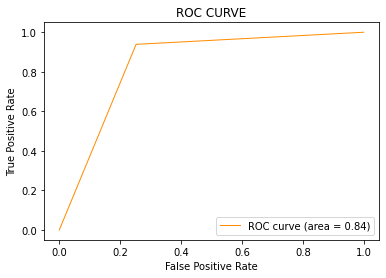

In [56]:
# plotting ROC curv
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [57]:
from xgboost import XGBClassifier

In [58]:
model = XGBClassifier(random_state=0)
model.fit(x_train, y_train)

XGBClassifier()

In [59]:
y_pred1 = model.predict(x_test)

In [60]:
matrix=confusion_matrix(y_test,y_pred1)
print(matrix)
score=accuracy_score(y_test,y_pred1)
print(score)
report=classification_report(y_test,y_pred1)
print(report)

[[ 643  435]
 [  58 1984]]
0.8419871794871795
              precision    recall  f1-score   support

           0       0.92      0.60      0.72      1078
           1       0.82      0.97      0.89      2042

    accuracy                           0.84      3120
   macro avg       0.87      0.78      0.81      3120
weighted avg       0.85      0.84      0.83      3120



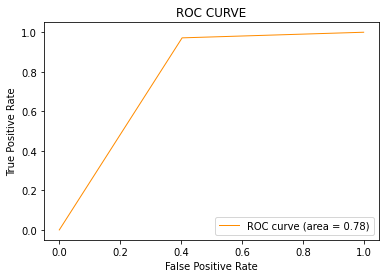

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [62]:
import pickle

In [68]:
filename = 'Sentiment_analysis.pkl'
pickle.dump(randomclassifier,open(filename,'wb'))

In [67]:
#!pip freeze > requirements.txt

In [69]:
filename = 'transformer.pkl'
pickle.dump(vectorizer,open(filename,'wb'))